## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## Importing Dataframe

In [4]:
path = r'C:\Users\User\Documents\Medical cost personal'

In [5]:
df =  pd.read_pickle(r'C:\Users\User\Documents\Medical cost personal\Prepared Data\df_clean.pkl')

## Exploring the data

In [6]:
df.shape

(1337, 8)

In [7]:
df.columns

Index(['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'Price category'],
      dtype='object')

In [8]:
df.dtypes

Age                 int64
sex                object
BMI               float64
children            int64
smoker             object
region             object
charges           float64
Price category     object
dtype: object

In [9]:
# checking for duplicate 
df_dups = df[df.duplicated()]

In [10]:
df_dups.shape

(0, 8)

In [11]:
# Check for missing values
print(df.isnull().sum())

Age               0
sex               0
BMI               0
children          0
smoker            0
region            0
charges           0
Price category    0
dtype: int64


In [12]:
# check for mixed data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

### Exploring Relationships

In [13]:
# correlation

In [14]:
# Create a correlation 
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_1408\3783679476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,BMI,children,charges
Age,1.000000,0.109344,0.041536,0.298308
BMI,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_1408\2907469462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


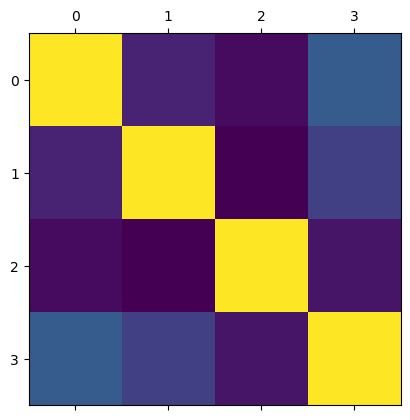

In [15]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1408\823377738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

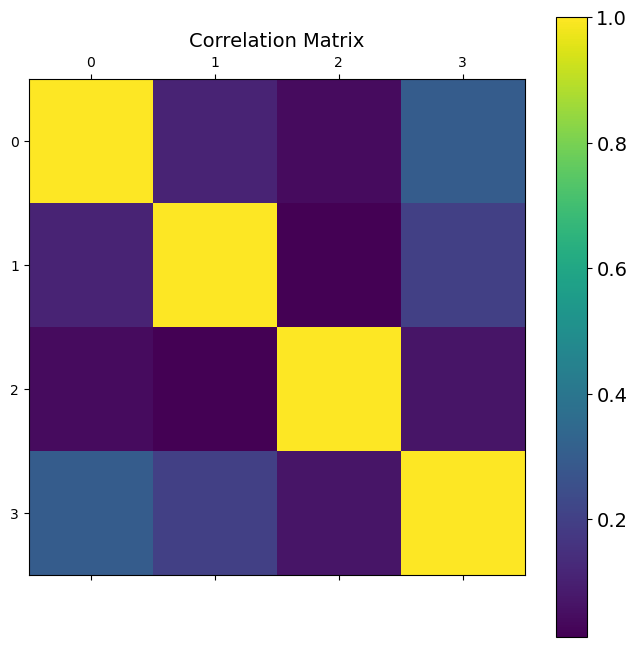

In [16]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [ ]:
# Export image


In [17]:
# Correlation Heatmap

C:\Users\User\AppData\Local\Temp\ipykernel_10856\78163172.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


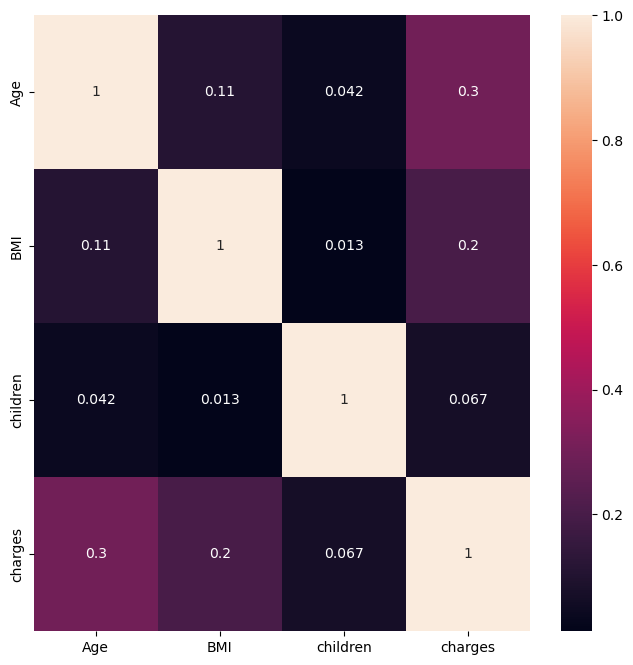

In [6]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [12]:
# Export Image
corr.figure.savefig(os.path.join(path, 'Visualization','correlation_heatmap.png'), bbox_inches='tight')

In [19]:
# scatterplot

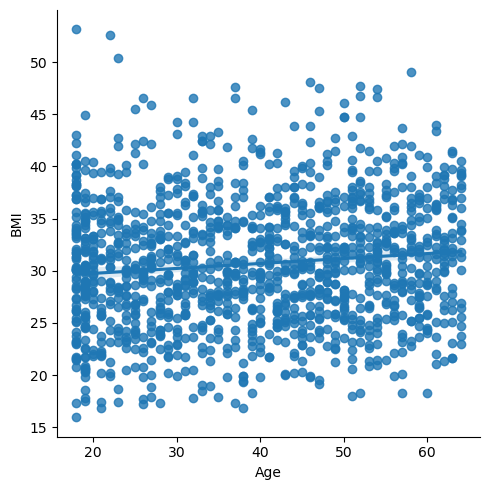

In [20]:
# Create a scatterplot for the "Age" and "BMI" columns in seaborn
sns.lmplot(x = 'Age', y = 'BMI', data = df)

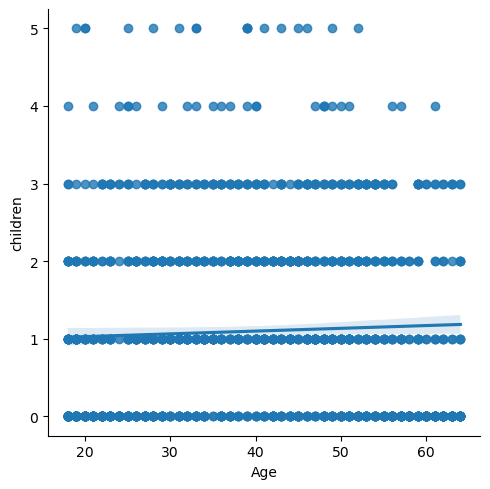

In [21]:
# Create a scatterplot for the "Age" and "children" columns in seaborn
sns.lmplot(x = 'Age', y = 'children', data = df)

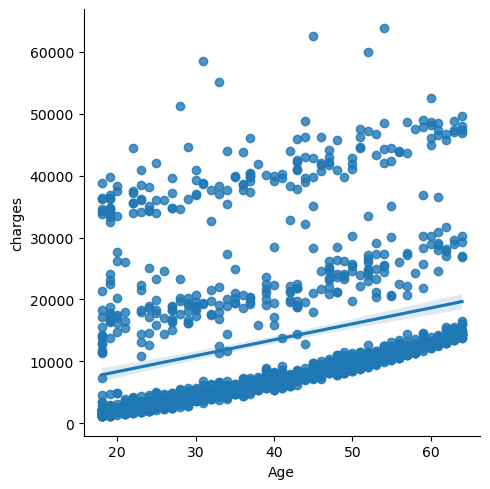

In [22]:
# Create a scatterplot for the "Age" and "charges" columns in seaborn
sns.lmplot(x = 'Age', y = 'charges', data = df)

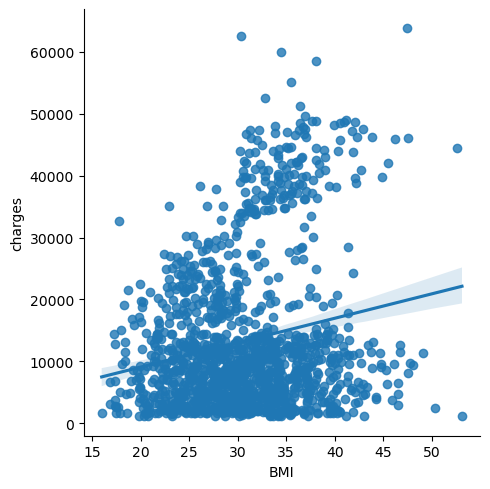

In [23]:
# Create a scatterplot for the "BMI" and "charges" columns in seaborn
sns.lmplot(x = 'BMI', y = 'charges', data = df)

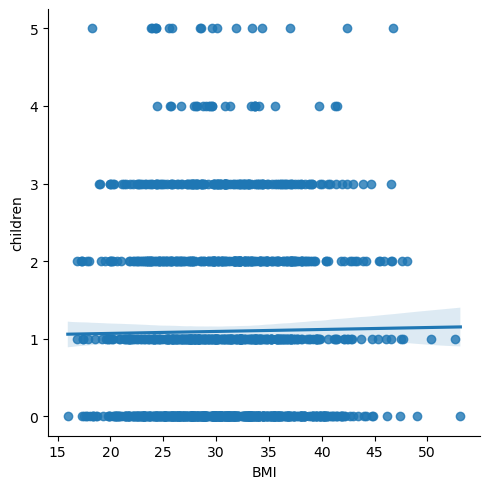

In [24]:
# Create a scatterplot for the "BMI" and "children" columns in seaborn
sns.lmplot(x = 'BMI', y = 'children', data = df)

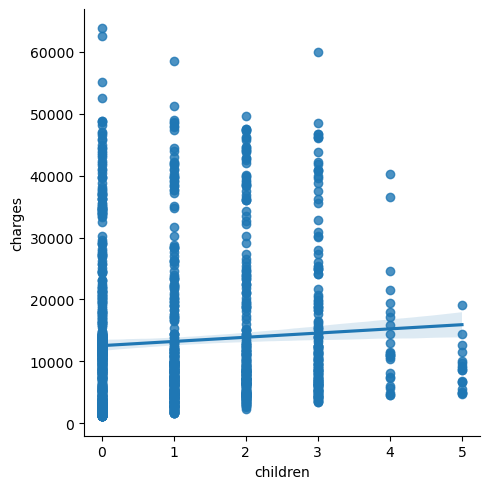

In [25]:
# Create a scatterplot for the "children" and "charges" columns in seaborn
sns.lmplot(x = 'children', y = 'charges', data = df)

In [26]:
# Pair Plot

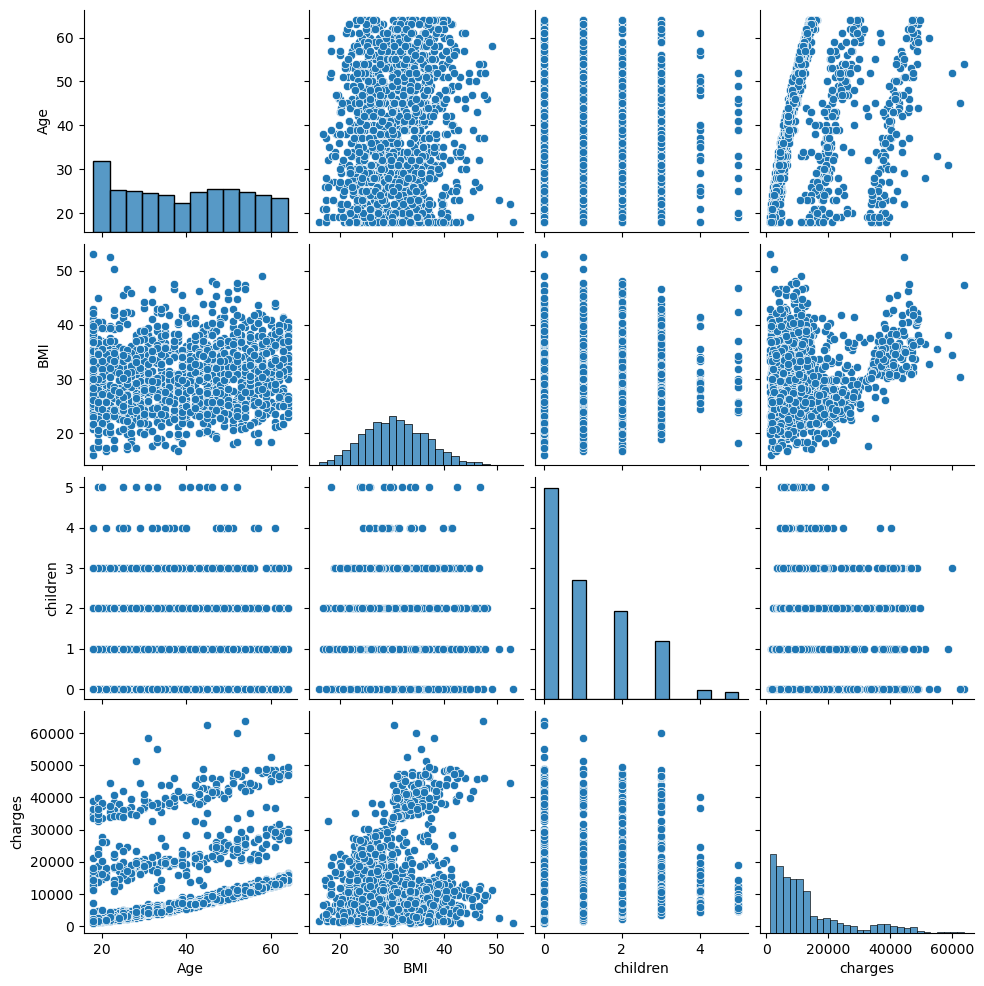

In [27]:
# Create a pair plot of entire dataset
g = sns.pairplot(df)

Histograms are used in the analysis to visualise the distribution of variables along diagonal cells, revealing their form, spread, and central tendency. The age variable has a uniform distribution, whereas the BMI variable has a moderate right skew, the children variable has a significant right skew, and the charges variable has a substantially right-skew distribution. Scatter plots in off-diagonal cells demonstrate a positive relationship between age and charges, a weak relationship between body mass index and charges, and a negative relationship between children and charges. There is no evident relationship between age and BMI or age and children.

In [28]:
# Categorical Plots

<Axes: xlabel='Age', ylabel='Count'>

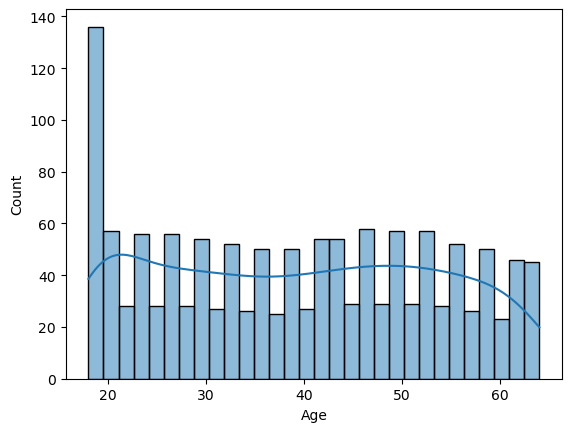

In [29]:
#See the distribution of 'Age'
sns.histplot(df['Age'], bins = 30, kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

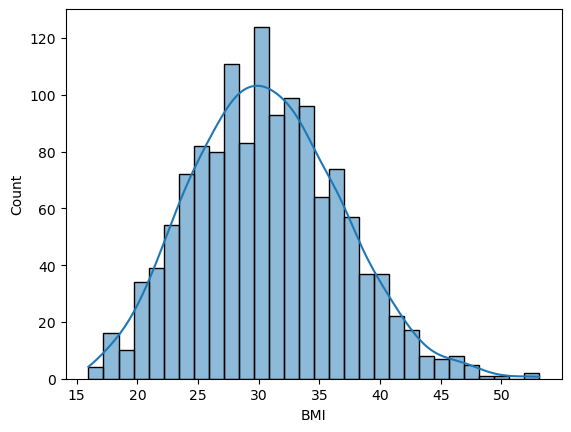

In [30]:
#See the distribution of 'BMI'
sns.histplot(df['BMI'], bins = 30, kde = True)

<Axes: xlabel='children', ylabel='Count'>

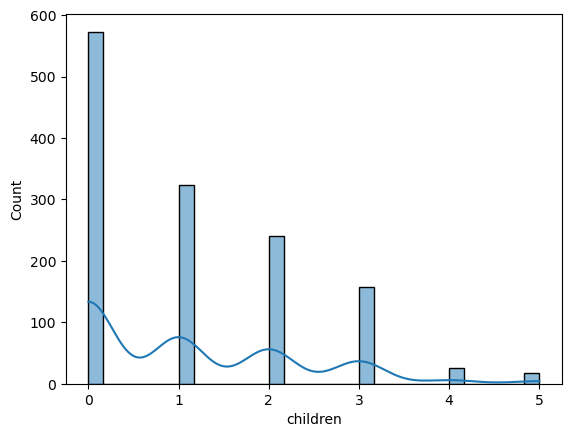

In [31]:
#See the distribution of 'children'
sns.histplot(df['children'], bins = 30, kde = True)

<Axes: xlabel='charges', ylabel='Count'>

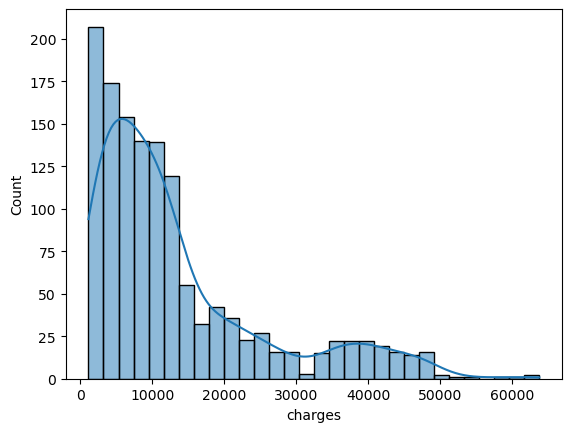

In [32]:
#See the distribution of 'charges'
sns.histplot(df['charges'], bins = 30, kde = True)

In [33]:
# Create the 'Price category' column based on 'charges' values
#df.loc[df['charges'] < 20, 'Price category'] = 'Low price'
#df.loc[(df['charges'] >= 20) & (df['charges'] < 50), 'Price category'] = 'Middle price'
#df.loc[df['charges'] >= 50, 'Price category'] = 'High price'

In [34]:
# Define the threshold values
max_threshold = 63770.42801
median_threshold = 9386.1613
min_threshold = 1121.8739

# Create the 'Price category' column based on 'charges' values
df.loc[df['charges'] < min_threshold, 'Price category'] = 'Low price'
df.loc[(df['charges'] >= min_threshold) & (df['charges'] < median_threshold), 'Price category'] = 'Middle price'
df.loc[df['charges'] >= median_threshold, 'Price category'] = 'High price'

In [35]:
df['Price category'].value_counts(dropna = False)

High price      669
Middle price    668
Name: Price category, dtype: int64

In [36]:
df.head()

,Age,sex,BMI,children,smoker,region,charges,Price category
0,19,female,27.900,0,yes,southwest,16884.92400,High price
1,18,male,33.770,1,no,southeast,1725.55230,Middle price
2,28,male,33.000,3,no,southeast,4449.46200,Middle price
3,33,male,22.705,0,no,northwest,21984.47061,High price
4,32,male,28.880,0,no,northwest,3866.85520,Middle price


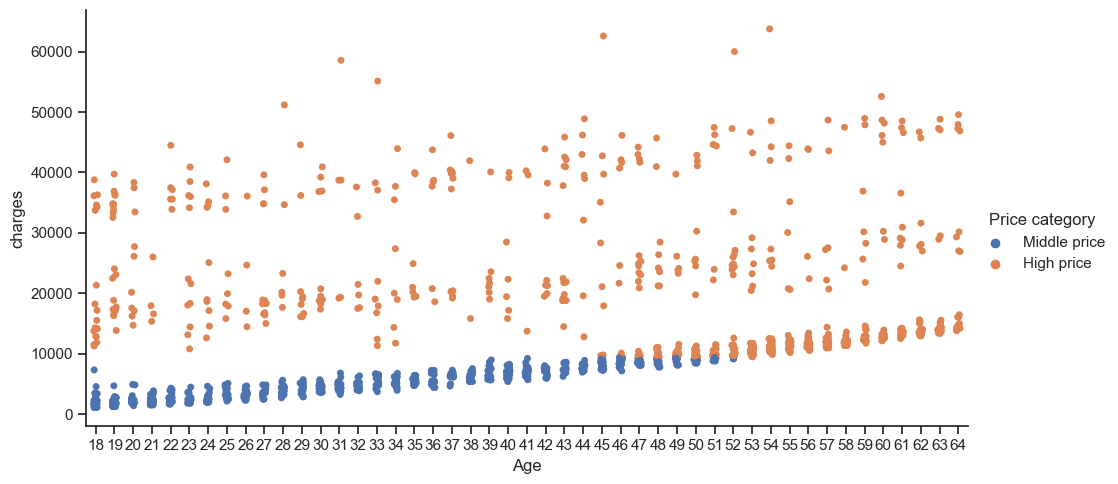

In [37]:
# Create a categorical plot 
sns.set(style='ticks')
g = sns.catplot(x='Age', y='charges', hue="Price category", data=df,aspect=2)

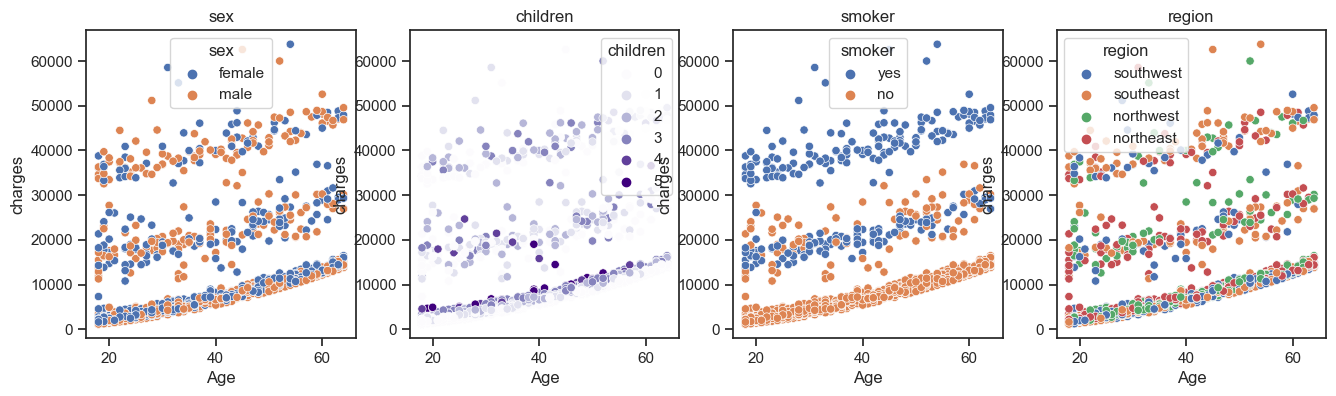

In [38]:
# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot sex
sns.scatterplot(x="Age", y="charges", hue="sex", data=df, ax=axes[0])
axes[0].set_title("sex")
# Plot children
sns.scatterplot(x="Age", y="charges", hue="children", palette="Purples", data=df, ax=axes[1])
axes[1].set_title("children")
# Plot smoker
sns.scatterplot(x="Age", y="charges", hue="smoker", data=df, ax=axes[2])
axes[2].set_title("smoker")
# Plot region
sns.scatterplot(x="Age", y="charges", hue="region", data=df, ax=axes[3])
axes[3].set_title("region")
# Show plot
plt.show()

The results demonstrate a positive correlation between age and medical costs in the high-price category, implying that older people had lower medical expenses than younger people. This could be attributed to reasons such as improved health insurance coverage, a greater emphasis on preventative healthcare, and fewer chronic health conditions. However, the large range of charges suggests that some people have very high or low medical expenses, which could be influenced by their specific health conditions, treatment options, or healthcare providers. Due to variables such as higher income criteria, limited demand for certain services, and limited availability of specific treatments or facilities, the lack of data points in this high-price category shows that it may not adequately represent the larger community.

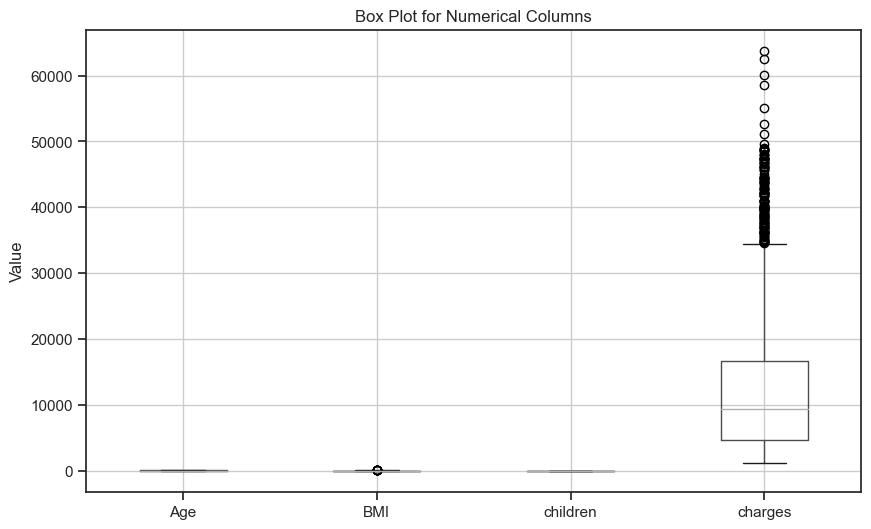

In [39]:
# Select numerical columns for the box plot
numerical_columns = ['Age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges']
       
# Create the box plot
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title("Box Plot for Numerical Columns")
#plt.xticks(rotation=90)
plt.ylabel("Value")
plt.show()

Outliers: The charges variable has the largest variation and skewness across numerical columns, indicating that individuals have substantial medical expenses. This could be related to factors such as age, health, and insurance coverage. With a tiny range of values, short whiskers, and no outliers, the children variable has the least fluctuation. Most people have the same number of children, with no outliers due to factors such as family planning, social conventions, and economic standing. With a medium range of values, balanced whiskers, and few outliers above the upper whisker, the age and bmi variables show moderate variation. These variations could be attributable to genetics, lifestyle, or environmental factors.

## Hypothesis

1.There is a significant correlation between age and medical expenses.

2.There is a significant correlation between BMI and medical charges.

In [40]:
df.to_pickle(os.path.join(path,'Prepared Data', 'df_clean.pkl'))

In [41]:
df.to_csv(os.path.join(path, 'Prepared Data', 'df_clean.csv'))